In [1]:
import pandas as pd
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('train (1).csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.shape

(1460, 81)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df.isnull().sum().sort_values()

Id                  0
TotalBsmtSF         0
Heating             0
SaleCondition       0
CentralAir          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
SaleType            0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
BsmtUnfSF           0
3SsnPorch           0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive          0
GarageArea          0
GarageCars          0
Fireplaces          0
EnclosedPorch       0
BsmtFinSF2          0
HeatingQC           0
SalePrice           0
LandSlope           0
LandContour         0
LotShape            0
Neighborhood        0
Condition1          0
Street              0
LotArea             0
MSZoning            0
BsmtFinSF1          0
Condition2

In [10]:
df['MSSubClass'] = df['MSSubClass'].astype('object')

In [11]:
round(df.isnull().sum()/len(df.index),2)[round(df.isnull().sum()/len(df.index),2).values>0.15]

LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [12]:
df = df.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis='columns')

In [13]:
round(df.isnull().sum()/len(df.index),2)[round(df.isnull().sum()/len(df.index),2).values>0.00]

MasVnrType      0.01
MasVnrArea      0.01
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
dtype: float64

In [14]:
df.MasVnrType.fillna('None',inplace=True)
df.MasVnrArea.fillna(df.MasVnrArea.mean(),inplace=True)
df.BsmtQual.fillna('TA',inplace=True)
df.BsmtCond.fillna('TA',inplace=True)
df.BsmtExposure.fillna('No',inplace=True)
df.BsmtFinType1.fillna('Unf',inplace=True)
df.BsmtFinType2.fillna('Unf',inplace=True)
df.GarageType.fillna('Attchd',inplace=True)
df.GarageYrBlt.fillna(-1,inplace=True)
df.GarageFinish.fillna('Unf',inplace=True)
df.GarageQual.fillna('TA',inplace=True)
df.GarageCond.fillna('TA',inplace=True)

In [15]:
df.isnull().sum().sort_values()

Id               0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
Fireplaces       0
FullBath         0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
CentralAir       0
BsmtHalfBath     0
GarageType       0
GarageYrBlt      0
GarageFinish     0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageArea       0
GarageCars       0
HeatingQC        0
SaleCondition    0
Heating          0
BsmtUnfSF        0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Street           0
LotArea          0
MSZoning         0
MSSubClass  

In [16]:
df.Street.value_counts()
df.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [17]:
df = df.drop(['Street','Utilities','Id'],axis='columns')

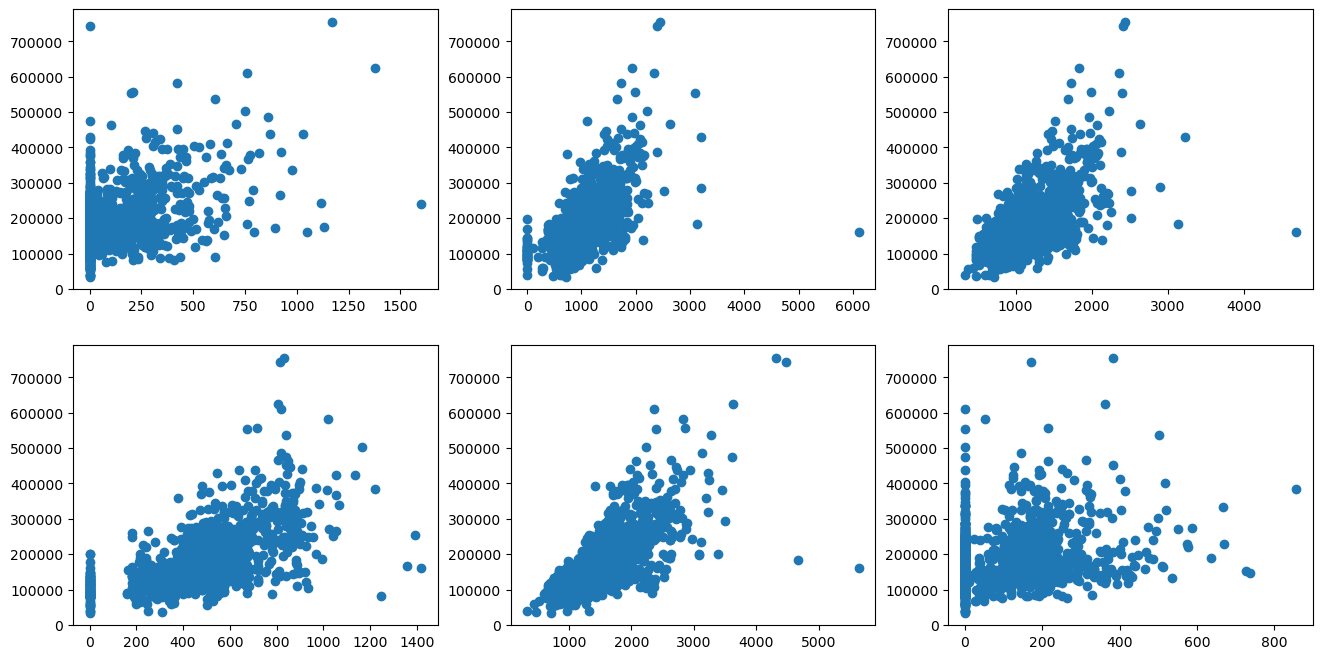

In [18]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(df['MasVnrArea'],df['SalePrice'])
plt.subplot(2,3,2)
plt.scatter(df['TotalBsmtSF'],df['SalePrice'])
plt.subplot(2,3,3)
plt.scatter(df['1stFlrSF'],df['SalePrice'])
plt.subplot(2,3,4)
plt.scatter(df['GarageArea'],df['SalePrice'])
plt.subplot(2,3,5)
plt.scatter(df['GrLivArea'],df['SalePrice'])
plt.subplot(2,3,6)
plt.scatter(df['WoodDeckSF'],df['SalePrice'])

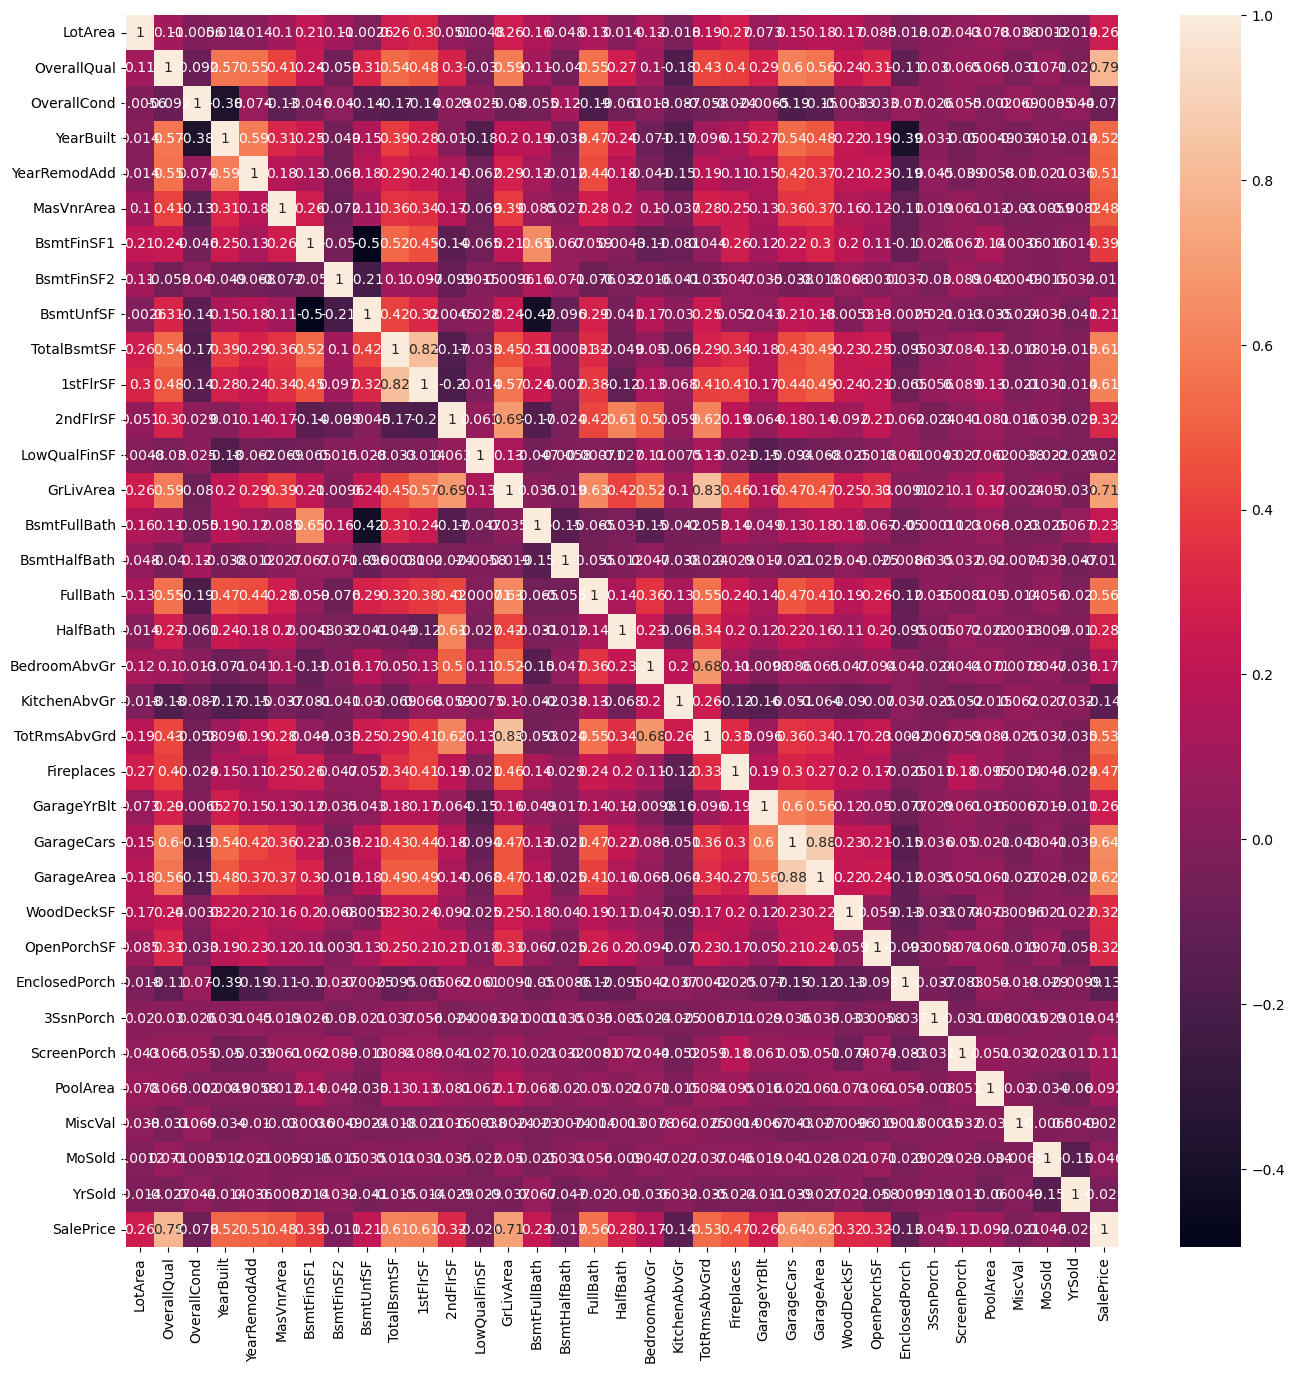

In [19]:
plt.figure(figsize=(16,16))
sns.heatmap(df[list(df.dtypes[df.dtypes!='object'].index)].corr(),annot=True)
plt.show()

# Sales Price the target variable and its distribution

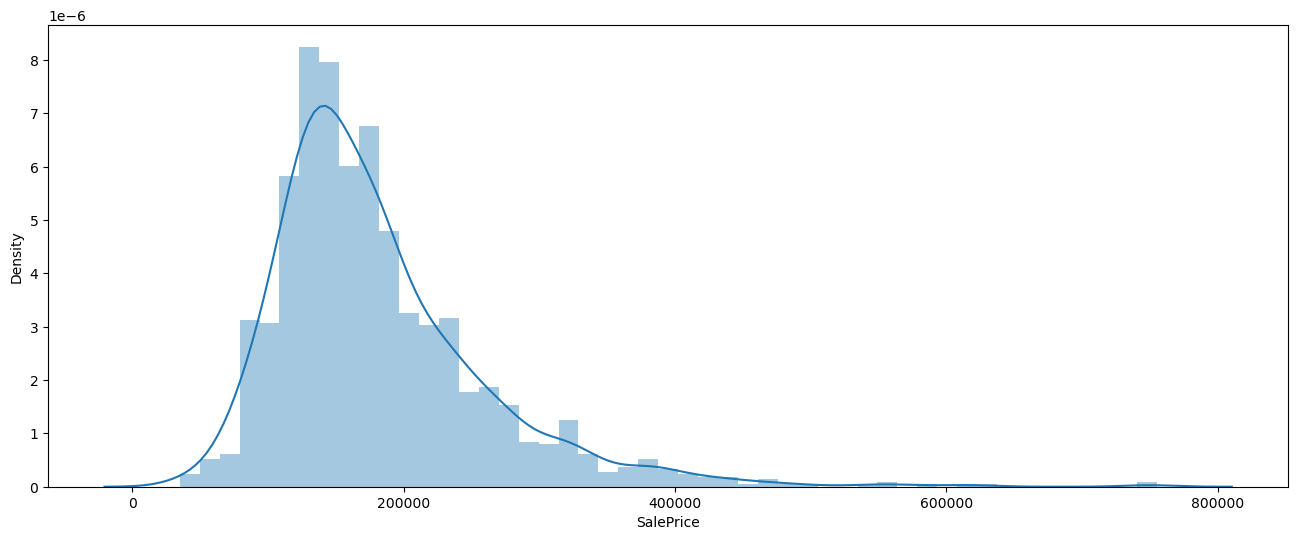

In [20]:
plt.figure(figsize=(16,6))
sns.distplot(df['SalePrice'])
plt.show()

Train Test Split for the dataset

In [21]:
df[list(df.dtypes[df.dtypes=='object'].index)].shape

(1460, 37)

In [22]:
df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [23]:
print(np.unique(df['LandSlope'].tolist()))
print(np.unique(df['ExterQual'].tolist()))
print(np.unique(df['BsmtQual'].tolist()))
print(np.unique(df['BsmtCond'].tolist()))
print(np.unique(df['BsmtExposure'].tolist()))
print(np.unique(df['BsmtFinType1'].tolist()))
print(np.unique(df['BsmtFinType2'].tolist()))
print(np.unique(df['HeatingQC'].tolist()))
print(np.unique(df['CentralAir'].tolist()))
print(np.unique(df['KitchenQual'].tolist()))
print(np.unique(df['GarageFinish'].tolist()))
print(np.unique(df['GarageQual'].tolist()))
print(np.unique(df['GarageCond'].tolist()))
print(np.unique(df['ExterCond'].tolist()))
print(np.unique(df['LotShape'].tolist()))

['Gtl' 'Mod' 'Sev']
['Ex' 'Fa' 'Gd' 'TA']
['Ex' 'Fa' 'Gd' 'TA']
['Fa' 'Gd' 'Po' 'TA']
['Av' 'Gd' 'Mn' 'No']
['ALQ' 'BLQ' 'GLQ' 'LwQ' 'Rec' 'Unf']
['ALQ' 'BLQ' 'GLQ' 'LwQ' 'Rec' 'Unf']
['Ex' 'Fa' 'Gd' 'Po' 'TA']
['N' 'Y']
['Ex' 'Fa' 'Gd' 'TA']
['Fin' 'RFn' 'Unf']
['Ex' 'Fa' 'Gd' 'Po' 'TA']
['Ex' 'Fa' 'Gd' 'Po' 'TA']
['Ex' 'Fa' 'Gd' 'Po' 'TA']
['IR1' 'IR2' 'IR3' 'Reg']


In [24]:
df['LandSlope'] = df.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
df['ExterQual'] = df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['CentralAir'] = df.CentralAir.map({'N':0,'Y':1})
df['KitchenQual'] = df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['GarageFinish'] = df.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual'] = df.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['ExterCond'] = df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['LotShape'] = df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

Creating and joining dummy column with the actual dataset

In [25]:
dummy_col = pd.get_dummies(df[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

df = pd.concat([df,dummy_col],axis='columns')

df = df.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

In [26]:
df_train,df_test = train_test_split(df,train_size=0.7,test_size=0.3,random_state=42)

In [27]:
numeric_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[numeric_col] = scaler.fit_transform(df_train[numeric_col])
df_test[numeric_col] = scaler.transform(df_test[numeric_col])

<Axes: xlabel='SalePrice', ylabel='Density'>

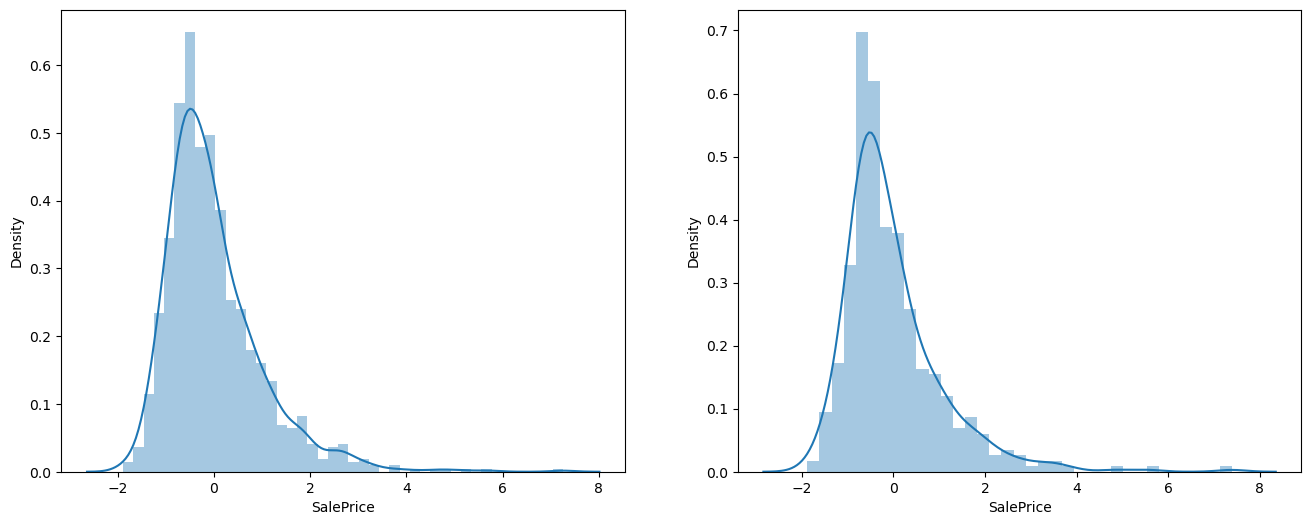

In [28]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train['SalePrice'])
plt.subplot(122)
sns.distplot(df_test['SalePrice'])

In [29]:
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

Lets initialy model the Linear Regression model.

In [33]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,step=70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), step=70)

In [34]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [35]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [36]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

In [37]:
X_train.head()

,OverallQual,BsmtQual,BsmtExposure,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea,GarageArea,GarageQual,MSZoning_FV,...,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Partial
135,0.636468,3,1,-0.971407,0.546680,-0.802940,0.287742,0.254644,3,0,...,0,0,0,0,0,0,0,0,0,0
1452,-0.822194,4,4,0.218347,-1.145636,-0.802940,-0.861096,0.230647,3,0,...,0,0,0,0,0,0,0,0,0,0
762,0.636468,4,2,-0.919206,-0.678405,0.972627,0.033491,0.657783,3,1,...,0,0,0,0,1,0,0,0,0,0
932,2.095130,5,1,-0.971407,1.890249,-0.802940,0.707727,1.492858,3,0,...,0,0,0,0,0,0,0,0,0,0
435,0.636468,4,3,-0.134012,-0.582276,1.088277,0.248192,0.350629,3,0,...,0,0,0,0,0,0,0,0,0,0


Lets try Lasso regression with fixed Alpha value

In [38]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8595646392358296
0.8618444610437768


In [39]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = X_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('OverallQual', -1.734),
 ('BsmtQual', 0.27),
 ('BsmtExposure', 0.167),
 ('BsmtFinSF1', 0.115),
 ('TotalBsmtSF', 0.076),
 ('2ndFlrSF', -0.028),
 ('GrLivArea', 0.056),
 ('GarageArea', 0.36),
 ('GarageQual', 0.076),
 ('MSZoning_FV', 0.096),
 ('MSZoning_RH', 0.172),
 ('MSZoning_RL', -0.0),
 ('MSZoning_RM', 0.089),
 ('LandContour_HLS', -0.0),
 ('LotConfig_CulDSac', 0.225),
 ('LotConfig_FR2', 0.191),
 ('LotConfig_FR3', -0.037),
 ('Neighborhood_BrDale', -0.0),
 ('Neighborhood_CollgCr', 0.0),
 ('Neighborhood_Edwards', -0.084),
 ('Neighborhood_IDOTRR', -0.196),
 ('Neighborhood_MeadowV', -0.136),
 ('Neighborhood_Mitchel', -0.085),
 ('Neighborhood_NAmes', -0.133),
 ('Neighborhood_NWAmes', -0.129),
 ('Neighborhood_NoRidge', -0.103),
 ('Neighborhood_NridgHt', 0.455),
 ('Neighborhood_OldTown', 0.521),
 ('Neighborhood_SWISU', -0.121),
 ('Neighborhood_SawyerW', -0.203),
 ('Neighborhood_Somerst', -0.034),
 ('Neighborhood_StoneBr', 0.027),
 ('Condition1_Norm', 0.481),
 ('Condition1_PosN', 0.148),
 ('C

In [40]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [41]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.010908,0.006646,0.001643,0.001916,0.001,{'alpha': 0.001},0.874552,0.892694,0.864292,0.859740,...,0.860554,0.859370,0.862157,0.887855,0.865073,0.869879,0.862199,0.854113,0.863670,0.009060
1,0.003941,0.001208,0.000933,0.000585,0.010,{'alpha': 0.01},0.853869,0.883630,0.864423,0.832597,...,0.796726,0.794872,0.796530,0.832182,0.803659,0.817085,0.790952,0.791536,0.801127,0.012721
2,0.002745,0.001425,0.001234,0.001873,0.100,{'alpha': 0.1},0.800138,0.835072,0.795075,0.759870,...,0.739812,0.737405,0.737031,0.784623,0.746018,0.763152,0.724467,0.732640,0.743726,0.016646
3,0.001713,0.000915,0.000716,0.000398,1.000,{'alpha': 1.0},-0.000056,-0.002887,-0.025191,-0.009947,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.001256,0.000015,0.000551,0.000006,5.000,{'alpha': 5.0},-0.000056,-0.002887,-0.025191,-0.009947,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


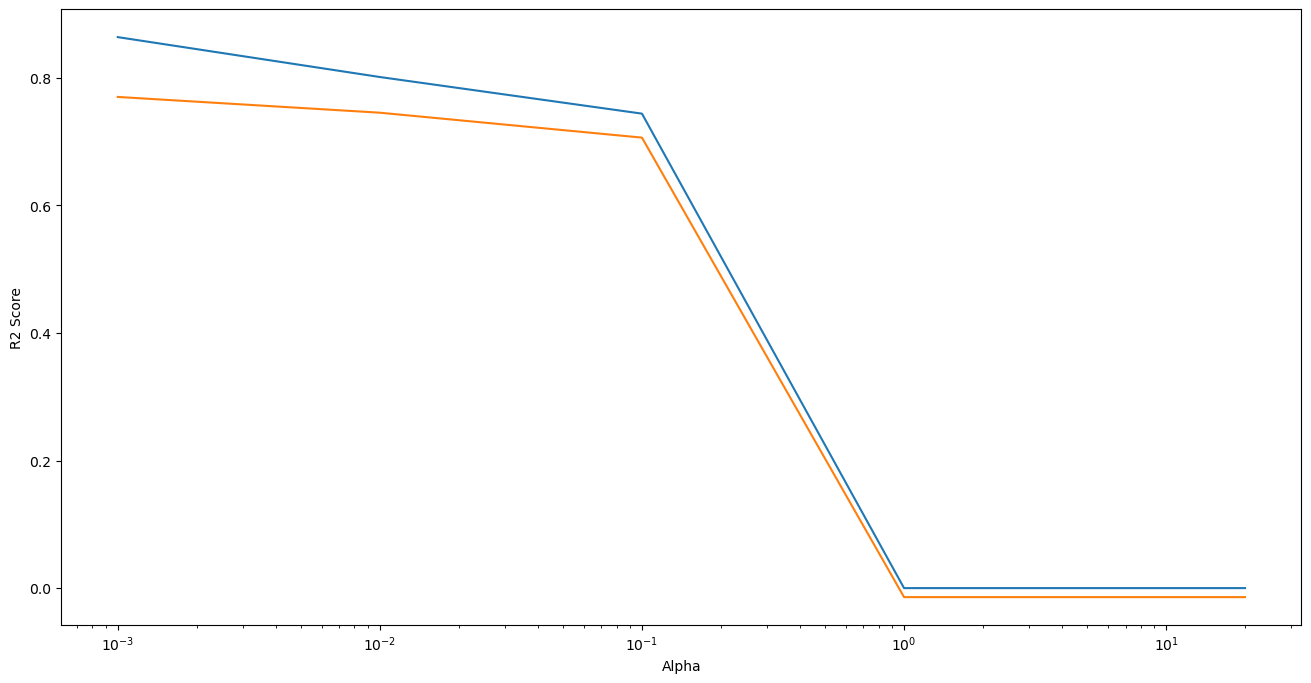

In [42]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [43]:
model_cv.best_params_

{'alpha': 0.001}

In [44]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8595646392358296
0.8618444610437768


In [45]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [46]:
print('Lasso Regression')
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Lasso Regression


,Featuere,Coef
57,Exterior1st_BrkComm,0.721311
72,Exterior2nd_Other,0.561896
27,Neighborhood_OldTown,0.521033
32,Condition1_Norm,0.480806
26,Neighborhood_NridgHt,0.454784
7,GarageArea,0.360448
52,RoofMatl_Metal,0.341358
1,BsmtQual,0.269775
69,Exterior2nd_CmentBd,0.258665
46,HouseStyle_2.5Fin,0.251684


In [47]:
lasso = Lasso(alpha=0.002)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8495000092402967
0.8600746141087835


In [48]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','double Coef']

In [49]:
print('Lasso Regression')
lasso_coef.sort_values(by='double Coef',ascending=False).head(10)

Lasso Regression


,Featuere,double Coef
27,Neighborhood_OldTown,0.480347
26,Neighborhood_NridgHt,0.441699
32,Condition1_Norm,0.431969
7,GarageArea,0.348412
72,Exterior2nd_Other,0.316468
57,Exterior1st_BrkComm,0.300106
1,BsmtQual,0.282245
46,HouseStyle_2.5Fin,0.235078
69,Exterior2nd_CmentBd,0.211573
14,LotConfig_CulDSac,0.208250


Lets go with Ridge Regression

In [50]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8994807930870055
0.7495953489459101


In [51]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [52]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.004199,0.003243,0.001065,0.000519,0.001,{'alpha': 0.001},0.865646,0.874035,-0.005783,0.859330,...,0.898941,0.901732,0.904418,0.897098,0.903695,0.911976,0.907887,0.896689,0.902168,0.004646
1,0.002025,0.001066,0.000584,0.000065,0.010,{'alpha': 0.01},0.864658,0.875473,0.119831,0.860295,...,0.898721,0.901409,0.904104,0.897096,0.903473,0.911634,0.907524,0.896356,0.901892,0.004600
2,0.001800,0.000828,0.000717,0.000409,0.100,{'alpha': 0.1},0.857069,0.878420,0.623052,0.860507,...,0.891502,0.892276,0.895193,0.896950,0.896162,0.902054,0.897411,0.886953,0.893932,0.004200
3,0.001757,0.000835,0.000875,0.000667,0.200,{'alpha': 0.2},0.854564,0.878634,0.754906,0.858872,...,0.885023,0.885062,0.888125,0.896625,0.889549,0.894623,0.889397,0.879549,0.887478,0.005016
4,0.001542,0.000181,0.000545,0.000007,0.500,{'alpha': 0.5},0.855694,0.880628,0.837204,0.856768,...,0.875429,0.875214,0.878375,0.895300,0.879635,0.884946,0.878062,0.869544,0.878415,0.006860


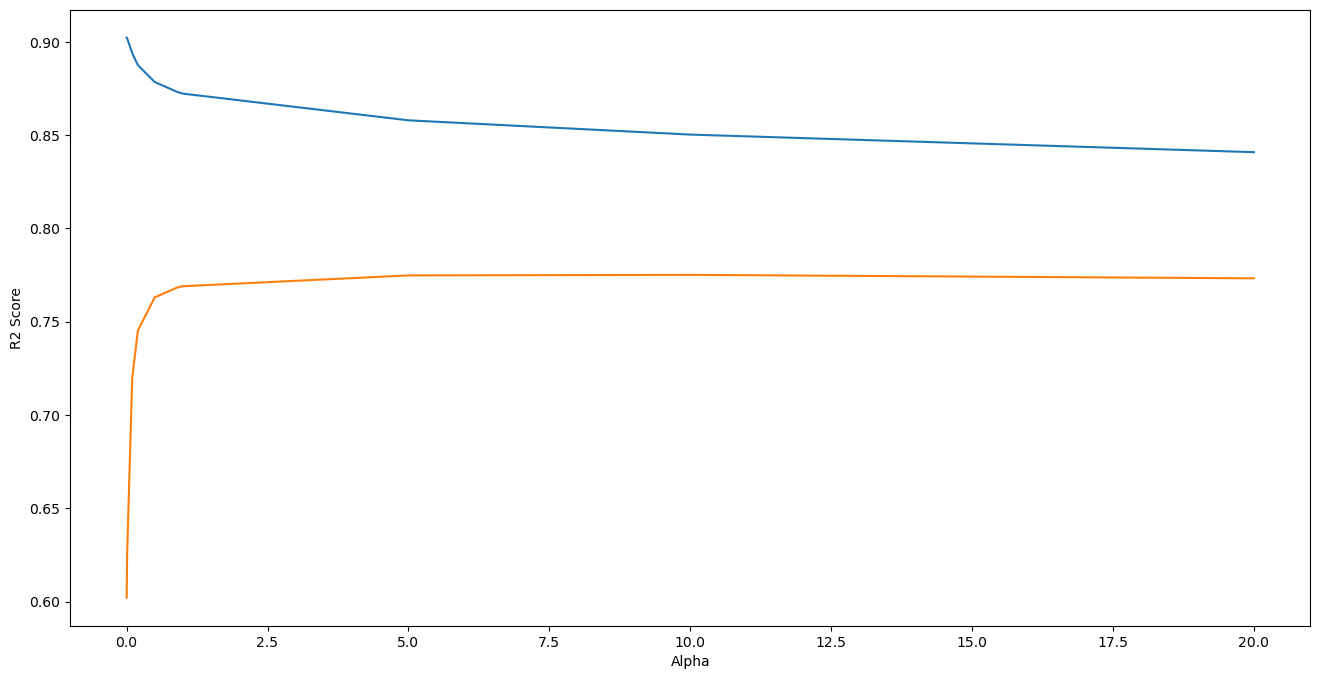

In [53]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [54]:
model_cv.best_params_

{'alpha': 10.0}

In [55]:
ridge = Ridge(alpha = 10.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8484512863885689
0.8568740959515067


In [56]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
print('Ridge Regression')
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Ridge Regression


,Feaure,Coef
27,Neighborhood_OldTown,0.368760
26,Neighborhood_NridgHt,0.343740
7,GarageArea,0.343602
32,Condition1_Norm,0.317894
1,BsmtQual,0.272721
46,HouseStyle_2.5Fin,0.249716
72,Exterior2nd_Other,0.239375
57,Exterior1st_BrkComm,0.235721
69,Exterior2nd_CmentBd,0.193944
37,Condition2_PosN,0.187426


Doubling the alpha value to see the results

In [57]:
ridge = Ridge(alpha = 20.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8395907153246821
0.8545033631095006


In [58]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Double Coef']

In [59]:
print('Ridge Regression')
ridge_coef.sort_values(by='Double Coef',ascending=False).head(10)

Ridge Regression


,Feaure,Double Coef
7,GarageArea,0.322574
27,Neighborhood_OldTown,0.283950
1,BsmtQual,0.283564
26,Neighborhood_NridgHt,0.269342
46,HouseStyle_2.5Fin,0.225132
32,Condition1_Norm,0.224319
2,BsmtExposure,0.173249
15,LotConfig_FR2,0.159973
33,Condition1_PosN,0.146956
14,LotConfig_CulDSac,0.145791


Based on the models Ridge and Lasso we can see that the r2_scores are almost same for both of them but as lasso has more importance on the dataset so based on that we can consider going ahead in selecting the model

In [60]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8595646392358296
0.8618444610437768


Best alpha value for Lasso : {'alpha': 0.001}
Best alpha value for Ridge : {'alpha': 10.0}

Removing the 5 best features from Lasso Regression

In [62]:
X_train.columns

Index(['OverallQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF',
       '2ndFlrSF', 'GrLivArea', 'GarageArea', 'GarageQual', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LandContour_HLS',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'Neighborhood_BrDale', 'Neighborhood_CollgCr', 'Neighborhood_Edwards',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Condition1_Norm', 'Condition1_PosN', 'Condition1_RRNe',
       'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosN',
       'Condition2_RRAe', 'Condition2_RRAn', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',

In [63]:
X_train_drp = X_train.drop(['HouseStyle_2.5Fin','Condition1_PosN','Condition1_Norm','Neighborhood_OldTown','Neighborhood_NridgHt'], axis = 1)
X_test_drp = X_test.drop(['HouseStyle_2.5Fin','Condition1_PosN','Condition1_Norm','Neighborhood_OldTown','Neighborhood_NridgHt'], axis =1 )

In [64]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_drp,y_train)

y_train_pred = lasso.predict(X_train_drp)
y_test_pred = lasso.predict(X_test_drp)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8486659916740966
0.8481997462369055


In [65]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train_drp.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
print('Lasso Regression')
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Lasso Regression


,Feaure,Coef
7,GarageArea,0.322574
27,Neighborhood_SawyerW,0.283950
1,BsmtQual,0.283564
26,Neighborhood_SWISU,0.269342
46,RoofMatl_CompShg,0.225132
32,Condition2_Norm,0.224319
2,BsmtExposure,0.173249
15,LotConfig_FR2,0.159973
33,Condition2_PosN,0.146956
14,LotConfig_CulDSac,0.145791
